<a href="https://colab.research.google.com/github/Samonto-Karmaker/CSE422-Project/blob/main/CSE422_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot
from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/422_practice/movies.csv")

In [ ]:
# dropping irrelevant columns
data = data.drop(['homepage', 'id', 'keywords', 'overview', 'original_title', 'status', 'vote_count','production_companies',
                  'tagline', 'cast', 'crew', 'production_countries', 'index', 'spoken_languages'], axis=1)

# drop rows with null values
data = data.dropna(axis=0, subset=['genres', 'release_date', 'runtime', 'director'])
data.shape

(4757, 10)

In [ ]:
# separate title and director for data analysis if needed
title_director = data[['title', 'director']]

In [ ]:
# delete title and director from main dataframe
data = data.drop(['title', 'director'], axis=1)
data = data.reset_index()
data = data.drop(['index'], axis=1)

In [ ]:

# one-hot encoding to find genres for each title
data_dict = {}
count = 0
for row in data["genres"]:
    row_split = row.split()

    for string in row_split:
        if string not in data.columns:
            data[string] = 0
            data_dict[string] = 1
        else:
            data_dict[string] += 1
        data[string][count] = 1  # data[string][count] = 1 raises SettingWithCopyError
        # data.loc[count,string] = 1 alternate solution
    count += 1



In [ ]:
# update dataframe by removing 'genres' column
data = data.drop(['genres'], axis=1)

# science fiction is only one value. Delete either science or fiction and name the undeleted column 'science fiction'
data = data.drop(['Fiction'], axis=1)
data = data.rename(columns={'Science': 'Science Fiction'})

In [ ]:
##   visualize column 'original_language'
original_language = data['original_language'].value_counts()
langauge = {'others': 0}
i = 0
while i < len(original_language):
    if original_language[i] < 15:
        langauge['others'] += original_language[i]
    else:
        langauge[original_language.keys()[i]] = original_language[i]
    i += 1

languages = list(langauge.keys())
count = list(langauge.values())

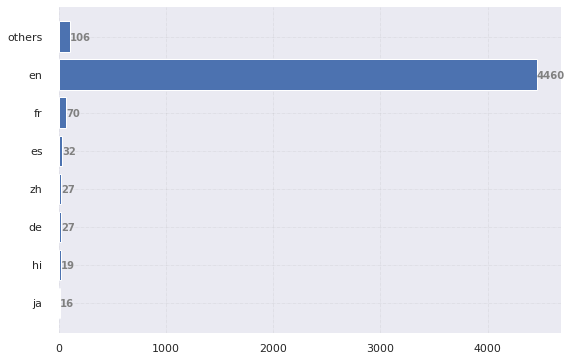

In [ ]:
# Figure Size
fig, ax = plot.subplots(figsize=(9, 6))

# Horizontal Bar Plot
ax.barh(languages, count)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(visible=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plot.text(i.get_width() + 0.2, i.get_y() + 0.5, str(round((i.get_width()), 2)),
              fontsize=10, fontweight='bold', color='grey')
plot.show()

In [ ]:
# almost 94% of our column has 'en'. We can create a single column english. 1 --> for en; 0 --> others or signifying not english

data['English'] = 1
for i in range(0, len(data)):
    if data['original_language'][i] != "en":
        data['English'][i] = 0

In [ ]:
# our dataset is based on movies. It makes no sense to make a movie tv column. By observing those specific rows,
# we see that those are movies. Therefore, these columns are unnecessary
data = data.drop(['TV', 'Movie', 'original_language'], axis=1)

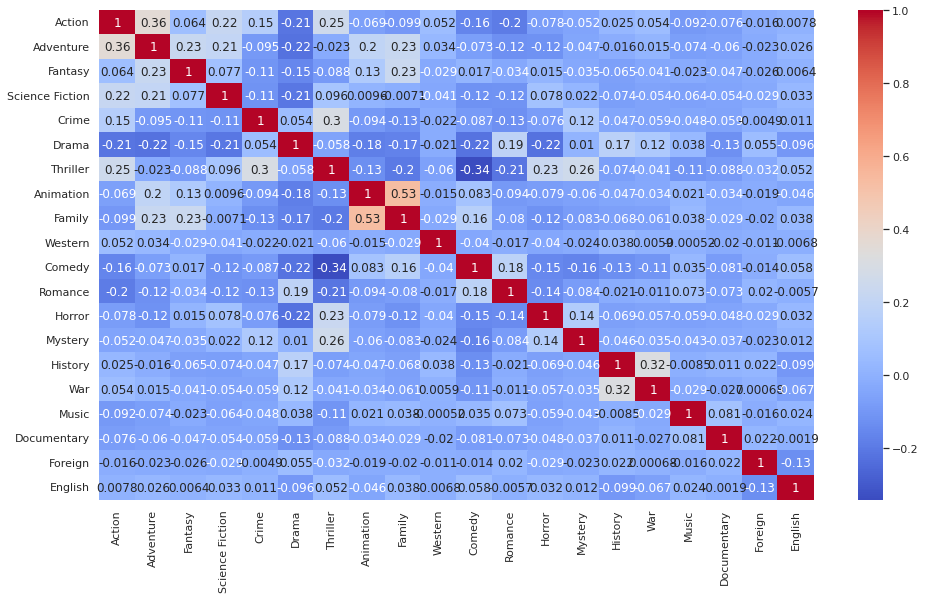

In [ ]:
# check correlation between genre type columns
data_genre = data.iloc[:, 6:26]
data_corr = data_genre.corr()
sns.set(rc={'figure.figsize': (16, 9)})
sns.heatmap(data_corr, annot=True, fmt='.2g', cmap='coolwarm')
plot.show()

In [ ]:
# release date column
data["release_date"] = pd.to_datetime(data["release_date"], format="%Y-%m-%d")  # convert string to datetime
data["release_date_month"] = data["release_date"].dt.month  # take month of release
data["release_date_year"] = data["release_date"].dt.year  # take year of release
data.drop("release_date", axis=1, inplace=True)  # drop release_date as no longer needed

In [ ]:
data.shape

(4757, 27)

In [ ]:
data.head()

,budget,popularity,revenue,runtime,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,...,Horror,Mystery,History,War,Music,Documentary,Foreign,English,release_date_month,release_date_year
0,237000000,150.437577,2787965087,162.0,7.2,1,1,1,1,0,...,0,0,0,0,0,0,0,1,12,2009
1,300000000,139.082615,961000000,169.0,6.9,1,1,1,0,0,...,0,0,0,0,0,0,0,1,5,2007
2,245000000,107.376788,880674609,148.0,6.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,10,2015
3,250000000,112.312950,1084939099,165.0,7.6,1,0,0,0,1,...,0,0,0,0,0,0,0,1,7,2012
4,260000000,43.926995,284139100,132.0,6.1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,3,2012


In [ ]:
print(data["budget"].describe())

count    4.757000e+03
mean     2.931976e+07
std      4.082173e+07
min      0.000000e+00
25%      1.000000e+06
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64


In [ ]:
print(data["revenue"].describe())

count    4.757000e+03
mean     8.305551e+07
std      1.634410e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.970116e+07
75%      9.394577e+07
max      2.787965e+09
Name: revenue, dtype: float64


In [ ]:
print(data["popularity"].describe())

count    4757.000000
mean       21.697812
std        31.901060
min         0.000372
25%         4.898424
50%        13.222268
75%        28.570174
max       875.581305
Name: popularity, dtype: float64


In [ ]:
impute = SimpleImputer(missing_values=0, strategy='mean')

impute.fit(data[["revenue"]])
data['revenue'] = impute.transform(data[["revenue"]])

impute.fit(data[["budget"]])
data['budget'] = impute.transform(data[["budget"]])

print(data["budget"].describe())
print(data["revenue"].describe())

count    4.757000e+03
mean     3.713367e+07
std      3.791126e+07
min      1.000000e+00
25%      1.200000e+07
50%      3.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64
count    4.757000e+03
mean     1.170999e+08
std      1.545471e+08
min      5.000000e+00
25%      2.728151e+07
50%      1.157727e+08
75%      1.170999e+08
max      2.787965e+09
Name: revenue, dtype: float64


In [ ]:
x = data.loc[:, data.columns != "popularity"]
y = data.loc[:, "popularity"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
scaler = MinMaxScaler()

scaler.fit(X_train)
scaler.fit(X_test)

xtrain_scaled = scaler.transform(X_train)
xtest_scaled = scaler.transform(X_test)


In [ ]:
#Ridge Regression
rid= Ridge()
rid.fit(xtrain_scaled, y_train)

rid_score_train = rid.score(xtrain_scaled, y_train)
rid_score_test = rid.score(xtest_scaled, y_test)

print("The Training accuracy of the model is {:.2f}".format(rid_score_train))
print("The Testing accuracy of the model is {:.2f}".format(rid_score_test))


The Training accuracy of the model is 0.40
The Testing accuracy of the model is 0.51


In [ ]:
#Decision Tree Regression
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(xtrain_scaled, y_train)

dtr_score_train = dtr.score(xtrain_scaled, y_train)
dtr_score_test = dtr.score(xtest_scaled, y_test)

print("The Training accuracy of the model is {:.2f}".format(dtr_score_train))
print("The Testing accuracy of the model is {:.2f}".format(dtr_score_test))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.40


In [ ]:
#Random Forest Regression
rfr = RandomForestRegressor(n_estimators = 150, random_state = 0)
rfr.fit(xtrain_scaled, y_train)

rfr_score_train = rfr.score(xtrain_scaled, y_train)
rfr_score_test = rfr.score(xtest_scaled, y_test)

print("The Training accuracy of the model is {:.2f}".format(rfr_score_train))
print("The Testing accuracy of the model is {:.2f}".format(rfr_score_test))

The Training accuracy of the model is 0.93
The Testing accuracy of the model is 0.67


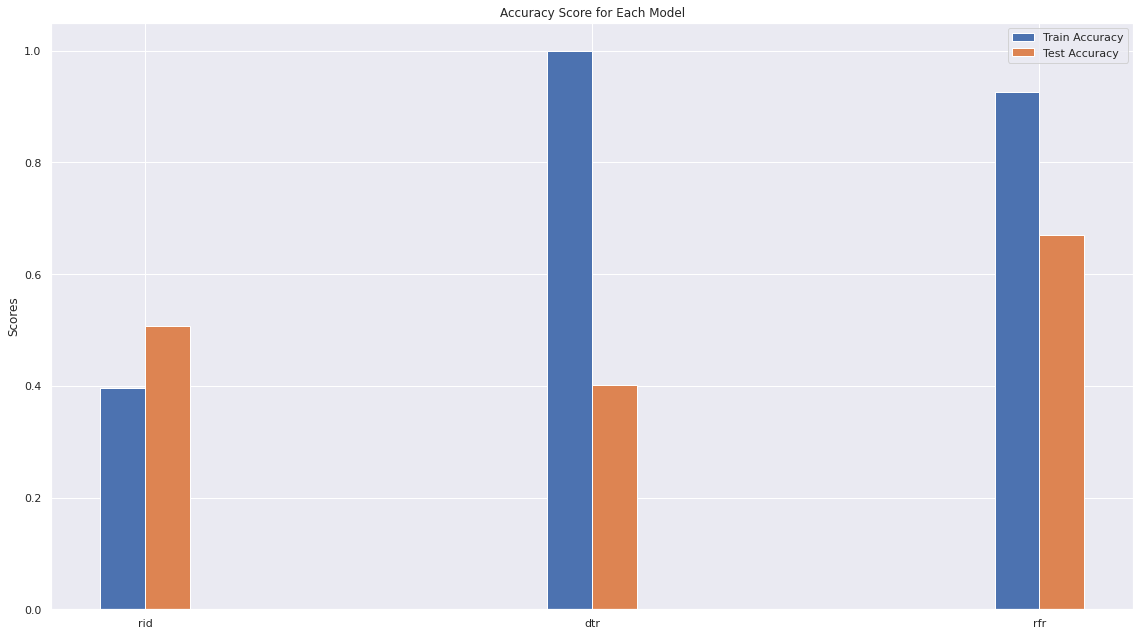

In [ ]:
labels = ["rid", "dtr", "rfr"]
train_accuracy = [rid_score_train, dtr_score_train, rfr_score_train]
test_accuracy = [rid_score_test, dtr_score_test, rfr_score_test]

x = np.arange(len(labels))
width = 0.1

fig, ax = plot.subplots()
rect1 = ax.bar(x - width / 2, train_accuracy, width, label = "Train Accuracy")
rect2 = ax.bar(x + width / 2, test_accuracy, width, label = "Test Accuracy")

ax.set_ylabel("Scores")
ax.set_title("Accuracy Score for Each Model")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plot.show()

In [ ]:
xtrain_scaled

array([[0.13157895, 0.00449845, 0.35483871, ..., 1.        , 0.        ,
        0.85227273],
       [0.09772019, 0.07736879, 0.43145161, ..., 0.        , 0.        ,
        0.72727273],
       [0.52631579, 0.70408954, 0.60887097, ..., 1.        , 0.45454545,
        0.875     ],
       ...,
       [0.13157895, 0.13365645, 0.46370968, ..., 1.        , 1.        ,
        0.78409091],
       [0.00730789, 0.02230216, 0.41129032, ..., 1.        , 0.63636364,
        0.11363636],
       [0.2559221 , 0.08780804, 0.46774194, ..., 0.        , 0.        ,
        0.89772727]])

In [ ]:
y_train

998       6.397388
3385      8.893676
12      145.847379
2704      3.231848
2382      7.871686
           ...    
2895      1.416796
2763      1.212956
905      35.537397
3980     67.417542
235      20.344364
Name: popularity, Length: 3805, dtype: float64

In [ ]:
#Random Forest Regression
rfr = RandomForestRegressor(n_estimators = 150, random_state = 0)
rfr.fit(xtrain_scaled, y_train)
rfr.fit(xtrain_scaled, y_train.values.ravel())

rfr_score_train = rfr.score(xtrain_scaled, y_train)
rfr_score_test = rfr.score(xtest_scaled, y_test)

print("The Training accuracy of the model is {:.2f}".format(rfr_score_train))
print("The Testing accuracy of the model is {:.2f}".format(rfr_score_test))  #Pre-trained model has been created

The Training accuracy of the model is 0.93
The Testing accuracy of the model is 0.67


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction and compare them with the real popularity from test data. 
predictions = rfr.predict(X_test) #enables us to predict the labels of the data values on the basis of the trained model. 

result = X_test
result['popularity'] = y_test
result['prediction'] = predictions.tolist() # from an array to a list
result.head() #showing the predicted values for the test dataset.

,budget,revenue,runtime,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,...,History,War,Music,Documentary,Foreign,English,release_date_month,release_date_year,popularity,prediction
4741,3.713367e+07,1.170999e+08,88.0,5.6,0,0,0,0,0,0,...,0,0,0,0,0,1,3,2009,0.674570,486.452990
3419,6.500000e+06,5.750407e+07,112.0,7.4,0,0,0,0,1,1,...,0,0,0,0,0,1,7,1991,17.705671,413.909120
3163,7.000000e+06,8.220215e+06,110.0,7.0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,2010,7.720692,487.618779
1141,4.100000e+07,2.150000e+08,110.0,6.8,0,0,0,0,0,1,...,0,0,0,0,0,1,11,2002,32.798571,413.821270
1916,2.500000e+07,1.341196e+07,107.0,7.0,0,0,0,0,0,1,...,0,0,0,0,0,1,6,2005,8.127728,413.821270


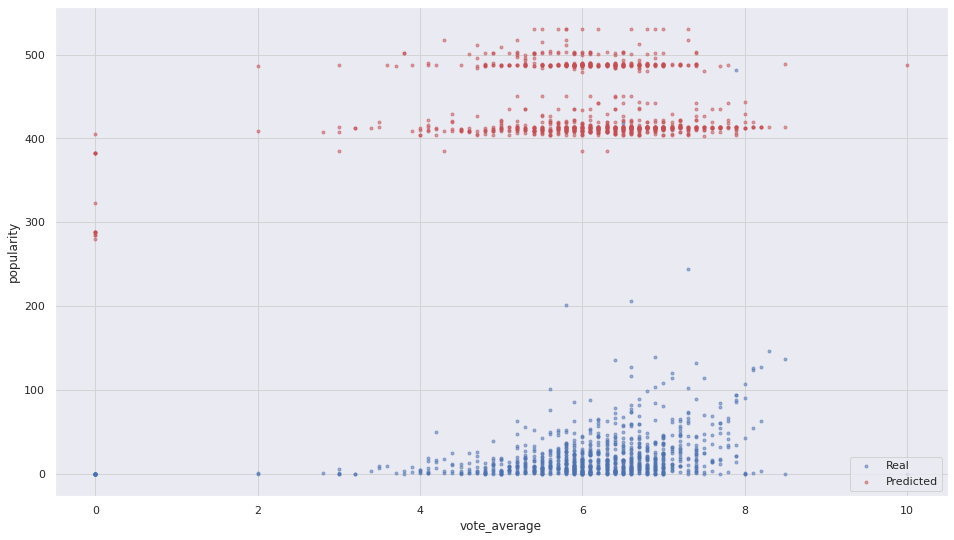

In [ ]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.vote_average

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Import library for metrics.   We have trained and tested our model using Random Forest Algo now we will look at Mean absolute error (MAE), Mean squared error (MSE), and R-squared scores for evaluation.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2)) 
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))   #model's predictions are worse than a constant function that always predicts the mean of the data.

Mean Absolute Error: 416.99
Mean Squared Error: 176603.58
R-squared scores: -163.96


In [ ]:
#Decision Tree Regression
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(xtrain_scaled, y_train)
dtr.fit(xtrain_scaled, y_train.values.ravel())

dtr_score_train = dtr.score(xtrain_scaled, y_train)
dtr_score_test = dtr.score(xtest_scaled, y_test)

print("The Training accuracy of the model is {:.2f}".format(dtr_score_train))
print("The Testing accuracy of the model is {:.2f}".format(dtr_score_test))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.40


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = dtr.predict(X_test)

result = X_test
result['popularity'] = y_test
result['prediction'] = predictions.tolist()
result.head()

,budget,revenue,runtime,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,...,History,War,Music,Documentary,Foreign,English,release_date_month,release_date_year,popularity,prediction
4741,3.713367e+07,1.170999e+08,88.0,5.6,0,0,0,0,0,0,...,0,0,0,0,0,1,3,2009,0.674570,724.247784
3419,6.500000e+06,5.750407e+07,112.0,7.4,0,0,0,0,1,1,...,0,0,0,0,0,1,7,1991,17.705671,724.247784
3163,7.000000e+06,8.220215e+06,110.0,7.0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,2010,7.720692,724.247784
1141,4.100000e+07,2.150000e+08,110.0,6.8,0,0,0,0,0,1,...,0,0,0,0,0,1,11,2002,32.798571,724.247784
1916,2.500000e+07,1.341196e+07,107.0,7.0,0,0,0,0,0,1,...,0,0,0,0,0,1,6,2005,8.127728,724.247784


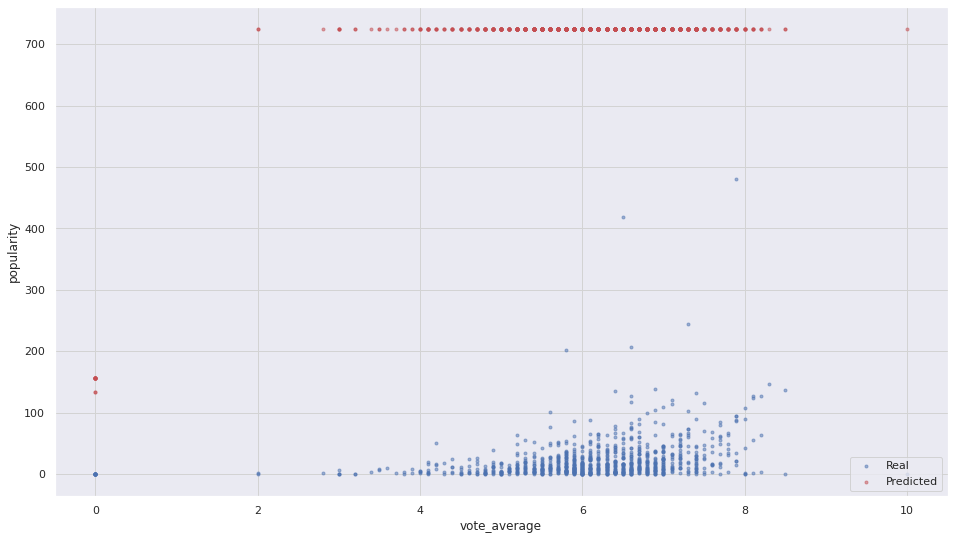

In [ ]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.vote_average

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2)) 
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))   #model's predictions are worse than a constant function that always predicts the mean of the data.

Mean Absolute Error: 694.38
Mean Squared Error: 487292.65
R-squared scores: -454.16


In [ ]:
#Ridge Regression
rid= Ridge()
rid.fit(xtrain_scaled, y_train)
rid.fit(xtrain_scaled, y_train.values.ravel())

rid_score_train = rid.score(xtrain_scaled, y_train)
rid_score_test = rid.score(xtest_scaled, y_test)

print("The Training accuracy of the model is {:.2f}".format(rid_score_train))
print("The Testing accuracy of the model is {:.2f}".format(rid_score_test))

The Training accuracy of the model is 0.40
The Testing accuracy of the model is 0.51


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = rid.predict(X_test)

result = X_test
result['popularity'] = y_test
result['prediction'] = predictions.tolist()
result.head()

,budget,revenue,runtime,vote_average,Action,Adventure,Fantasy,Science Fiction,Crime,Drama,...,History,War,Music,Documentary,Foreign,English,release_date_month,release_date_year,popularity,prediction
4741,3.713367e+07,1.170999e+08,88.0,5.6,0,0,0,0,0,0,...,0,0,0,0,0,1,3,2009,0.674570,1.544732e+10
3419,6.500000e+06,5.750407e+07,112.0,7.4,0,0,0,0,1,1,...,0,0,0,0,0,1,7,1991,17.705671,7.498116e+09
3163,7.000000e+06,8.220215e+06,110.0,7.0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,2010,7.720692,1.117225e+09
1141,4.100000e+07,2.150000e+08,110.0,6.8,0,0,0,0,0,1,...,0,0,0,0,0,1,11,2002,32.798571,2.815894e+10
1916,2.500000e+07,1.341196e+07,107.0,7.0,0,0,0,0,0,1,...,0,0,0,0,0,1,6,2005,8.127728,1.924176e+09


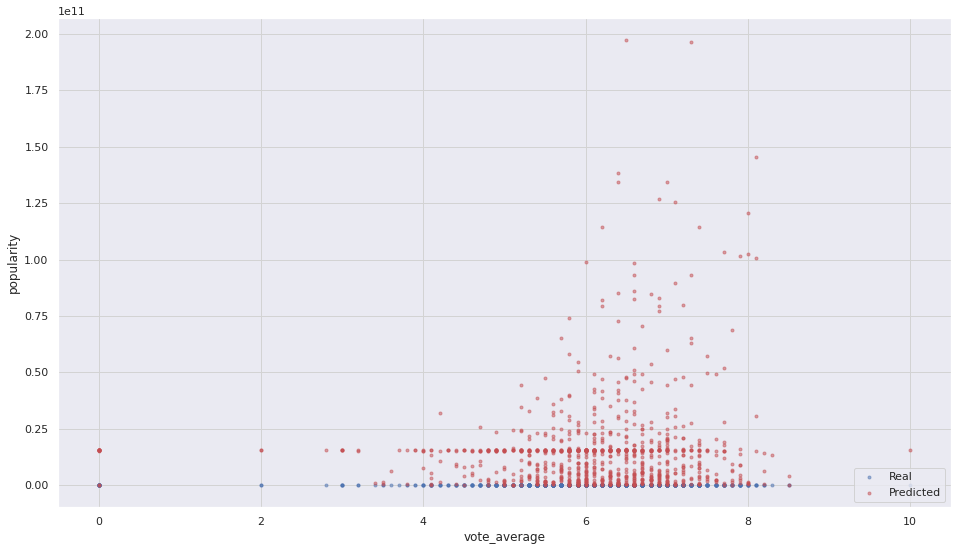

In [ ]:
# Import library for visualization
import matplotlib.pyplot as plt

# Define x axis
x_axis = X_test.vote_average

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('vote_average')
plt.ylabel('popularity')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R-squared scores
r2 = r2_score(y_test.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae, 2)) 
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))   #model's predictions are worse than a constant function that always predicts the mean of the data.

Mean Absolute Error: 15838134699.15
Mean Squared Error: 6.961938663906369e+20
R-squared scores: -6.502824118258776e+17
